## <center> <u> AZUBI AFRICA COHORT 2 - LP 6 </center> <u>

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset for this project

PF_Train = pd.read_csv("C:/Users/KWABENABOATENG/Desktop/AZUBI AFRICA/6 MONTHS PROJECT/SIXTH MONTH/Paitients_Files_Train.csv")

#### <u> KEY DETAILS TO FURTHER UNDERSTAND THE DATASET </u>

ID  - Unique number to represent patient ID  <br>                                                                               
PRG - Plasma glucose  <br>  
PL  - Blood Work Result-1 (mu U/ml)   <br>                                                                                     
PR  - Blood Pressure (mm Hg) <br>  
SK  - Blood Work Result-2 (mm)  <br>  
TS  - Blood Work Result-3 (mu U/ml)   <br>                                                                               
M11 - Body mass index (weight in kg/(height in m)^2  <br>  
BD2 - Blood Work Result-4 (mu U/ml)  <br>  
Age - patients age  (years)  <br>  
Insurance - If a patient holds a valid insurance card  <br>  
Sepssis - Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise  <br>  

In [3]:
#Display the dataset

PF_Train

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]

In [4]:
#Check the properties of the dataset

PF_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [5]:
#Check the shape of the dataset

PF_Train.shape

(599, 11)

In [6]:
#Check for null values in the dataset

PF_Train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
PF_Train.describe()

PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%      0.383000   29.000000    1.000000  
75%      0.647000   40.000000    1.000000  
max      2.420000   81.000000    1.000000

array([[<AxesSubplot: title={'center': 'PRG'}>,
        <AxesSubplot: title={'center': 'PL'}>,
        <AxesSubplot: title={'center': 'PR'}>],
       [<AxesSubplot: title={'center': 'SK'}>,
        <AxesSubplot: title={'center': 'TS'}>,
        <AxesSubplot: title={'center': 'M11'}>],
       [<AxesSubplot: title={'center': 'BD2'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Insurance'}>]], dtype=object)

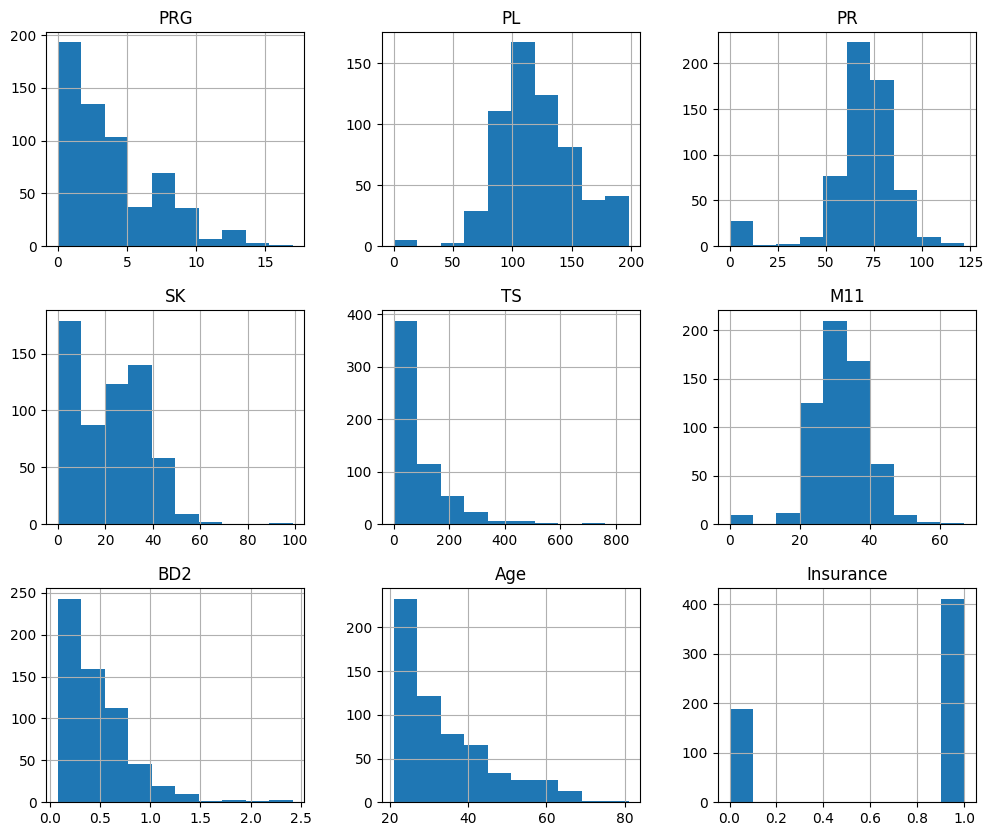

In [8]:
PF_Train.hist(figsize=(12, 10))

<AxesSubplot: >

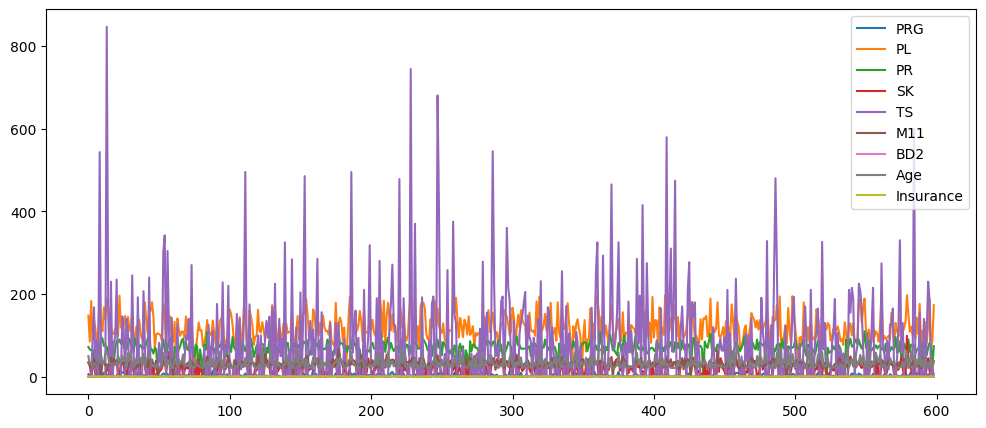

In [9]:
PF_Train.plot(figsize=(12, 5))

### EXPLORATORY DATA ANALYSIS

In [10]:
PF_Train_copy = PF_Train.copy

In [11]:
## DROP THE COLUMNS THAT ARE NOT NECESSARY FOR THIS ANALYSIS.

PF_Train.drop(columns = "ID", axis=1, inplace=True)

In [12]:
#Display the data set after deleting the unnecessary columns of the dataset.

PF_Train

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0      6  148  72  35    0  33.6  0.627   50          0  Positive
1      1   85  66  29    0  26.6  0.351   31          0  Negative
2      8  183  64   0    0  23.3  0.672   32          1  Positive
3      1   89  66  23   94  28.1  0.167   21          1  Negative
4      0  137  40  35  168  43.1  2.288   33          1  Positive
..   ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594    6  123  72  45  230  33.6  0.733   34          0  Negative
595    0  188  82  14  185  32.0  0.682   22          1  Positive
596    0   67  76   0    0  45.3  0.194   46          1  Negative
597    1   89  24  19   25  27.8  0.559   21          0  Negative
598    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 10 columns]

In [13]:
#Convert the Sepssis column from a categorical data to a numeric data.

le = LabelEncoder()
label = le.fit_transform(PF_Train['Sepssis'])
PF_Train.drop("Sepssis", axis=1, inplace=True)
PF_Train["Sepssis"] = label

In [14]:
PF_Train

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0      6  148  72  35    0  33.6  0.627   50          0        1
1      1   85  66  29    0  26.6  0.351   31          0        0
2      8  183  64   0    0  23.3  0.672   32          1        1
3      1   89  66  23   94  28.1  0.167   21          1        0
4      0  137  40  35  168  43.1  2.288   33          1        1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...      ...
594    6  123  72  45  230  33.6  0.733   34          0        0
595    0  188  82  14  185  32.0  0.682   22          1        1
596    0   67  76   0    0  45.3  0.194   46          1        0
597    1   89  24  19   25  27.8  0.559   21          0        0
598    1  173  74   0    0  36.8  0.088   38          1        1

[599 rows x 10 columns]

In [15]:
# Import libraries
#import os


#import plotly
#import string
#import re
#import matplotlib.pyplot as plt

#import nltk
#from nltk.corpus import stopwords
#from datasets import load_dataset
#from sklearn.model_selection import train_test_split

#from transformers import AutoModelForSequenceClassification
#from transformers import AutoTokenizer, AutoConfig, AdamW
#from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
#from sklearn.metrics import mean_squared_error
#from huggingface_hub import notebook_login